In [1]:
%load_ext autoreload
%autoreload 2
%aimport mc.util 
%aimport mc.mhr
from mc.util import *
from mc.mhr import *
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

plt.style.use('ggplot')
matplotlib.rcParams["mathtext.fontset"] = "cm"

os.environ['CC'] = 'clang'
os.environ['CXX'] = 'clang -shared'

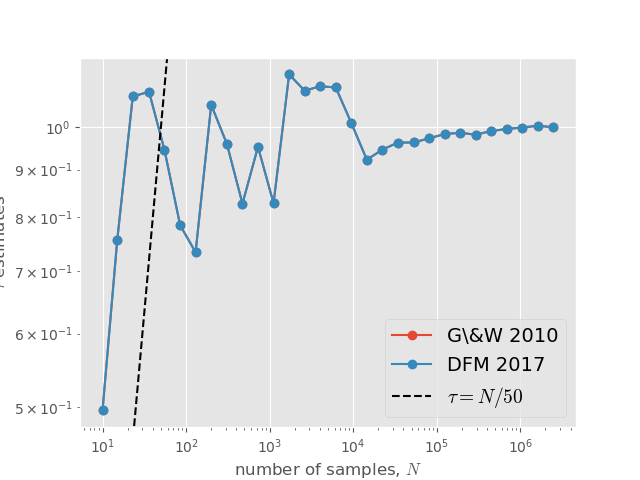

In [5]:
# e, k, s = read_histogram("new-data/vsweeps/binder-slp/1/96x96_r-0_t0.466074_j1.000_20000000.15_0/histogram.dat")
# chain = e[None, :]

l=12
e, k = read_histogram_winding(f"new-data/measure-k/0/{l}x{l}_r-0_t1.000000_uinf_j0.000_50000000.20_0/winding-histogram.dat")
chain = k[None, :, 0] + 1
# Compute the estimators for a few different chain lengths
N = np.geomspace(10, chain.shape[1], 30).astype(int)
gw2010 = np.empty(len(N))
new = np.empty(len(N))
for i, n in enumerate(N):
    gw2010[i] = autocorr_gw2010(chain[:, :n])
    new[i] = autocorr_new(chain[:, :n])

# Plot the comparisons
plt.figure()
plt.loglog(N, gw2010, "o-", label="G\&W 2010")
plt.loglog(N, new, "o-", label="DFM 2017")
ylim = plt.gca().get_ylim()
plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
plt.ylim(ylim)
plt.xlabel("number of samples, $N$")
plt.ylabel(r"$\tau$ estimates")
plt.legend(fontsize=14);

In [8]:
glob = "new-data/vsweeps/binder-slp/2b/60*/histogram.dat"
runs = get_runs(glob)
f1 = init_guess(runs)

In [11]:
np.concatenate(([0], f1))

array([  0.        ,  27.80283599,  55.89316546,  83.70090572,
       110.34027813, 137.30081509, 163.35851743, 190.32041176,
       216.82547908, 243.99617516, 270.52813413, 296.55815829,
       323.77075488, 350.8016134 , 378.61530577, 406.28190836])

In [5]:
print(iterate(f1, runs))

(array([ 54.64162821, 109.3552374 , 163.31766302, 216.55496221,
       268.28573613, 320.56367076, 374.09218921, 425.5308024 ,
       476.31398054, 527.85279598, 580.48863565, 631.8964263 ,
       685.94676377, 739.07378873, 793.09204299]), 2.8372092059102516e-06)


In [9]:
f = [27.80221606902781, 55.89327039025616, 83.70116282622209, 110.33973937681718, 137.3000198129294, 163.357786733169, 190.3201568679518, 216.8263453789292, 243.9965178723574, 270.5280697448883, 296.55838840955937, 323.77050047452485, 350.80149882229523, 378.6157081496778, 406.28204480543843]
print(iterate(f, runs))

(array([ 27.80219512,  55.89324586,  83.70113648, 110.33971347,
       137.29999659, 163.35776793, 190.32014392, 216.82633869,
       243.99651734, 270.52807435, 296.55839694, 323.77051198,
       350.80151233, 378.61572299, 406.28206046]), 7.534324598850851e-07)


In [18]:
iterate(f1, runs)

(array([ 54.64162821, 109.3552374 , 163.31766302, 216.55496221,
        268.28573613, 320.56367076, 374.09218921, 425.5308024 ,
        476.31398054, 527.85279598, 580.48863565, 631.8964263 ,
        685.94676377, 739.07378873, 793.09204299]),
 2.8372092059102516e-06)

In [30]:
iterate(f1, runs)

(array([ 54.64162817, 109.35523735, 163.31766297, 216.55496215,
        268.28573606, 320.56367076, 374.09218921, 425.5308024 ,
        476.31398054, 527.85279598, 580.48863565, 631.8964263 ,
        685.94676377, 739.07378873, 793.09204299]),
 2.8379116524000692e-06)

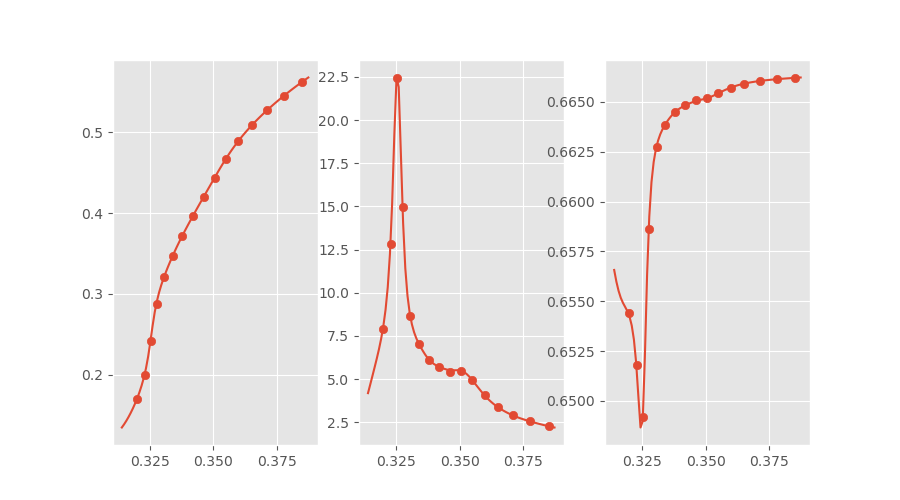

In [66]:
runs = get_runs("new-data/vsweeps/binder-slp/0.6/96*/histogram.dat")

fig, ax = plt.subplots(1, 3, figsize=[9, 5])
ax[0].plot(data["t"], data["e"])
ax[1].plot(data["t"], data["cv"])
ax[2].plot(data["t"], data["b_e"])

xs = []
ys = []
zs = []
ws = []
for run in runs:
    n = run["n"]
    xs.append(run["t"])

    ys.append(run["e"].mean() / n)
    zs.append(run["e"].std()**2 / n / run["t"]**2)
    ws.append(1 - np.mean(run["e"]**4) / np.mean(run["e"]**2)**2 / 3)

ax[0].scatter(xs, ys)
ax[1].scatter(xs, zs)
ax[2].scatter(xs, ws)

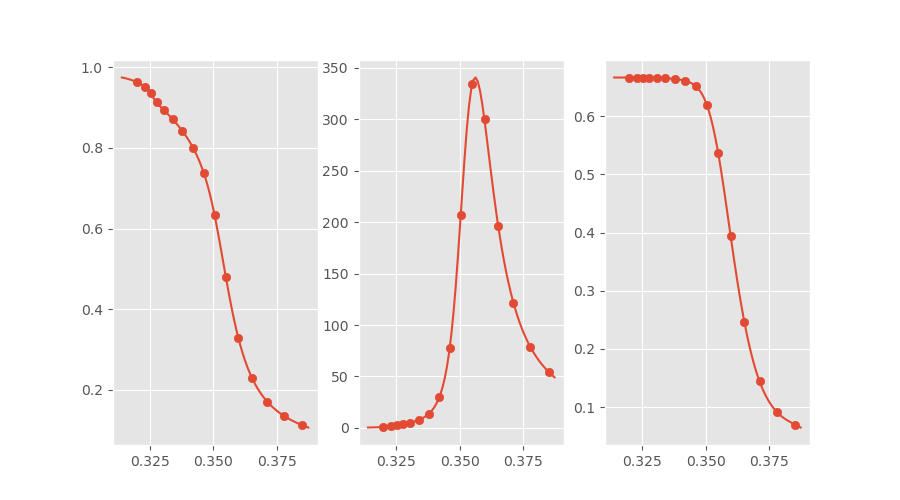

In [69]:
runs = get_runs("new-data/vsweeps/binder-slp/0.6/96*/histogram.dat")

fig, ax = plt.subplots(1, 3, figsize=[9, 5])
ax[0].plot(data["t"], data["s"])
ax[1].plot(data["t"], data["chi_s"])
ax[2].plot(data["t"], data["b_s"])

xs = []
ys = []
zs = []
ws = []
for run in runs:
    n = run["n"]
    xs.append(run["t"])

    ys.append(run["s"].mean() / n)
    zs.append(run["s"].std()**2 / n / run["t"])
    ws.append(1 - np.mean(run["s"]**4) / np.mean(run["s"]**2)**2 / 3)

ax[0].scatter(xs, ys)
ax[1].scatter(xs, zs)
ax[2].scatter(xs, ws)